## Exercício 1
![alt text]({BCEEEDE8-B885-4341-BC3C-07161436D846}.png)

Tempos com for puro: [0.020810400000300433, 0.11246220000066387, 1.1423271999992721, 18.306055699999888]
Tempos com numpy: [0.001268799999706971, 0.003091599999606842, 0.0360222999997859, 0.34910039999977016]
Tempos com Fortran: [0.0, 0.0, 0.046875, 0.640625]


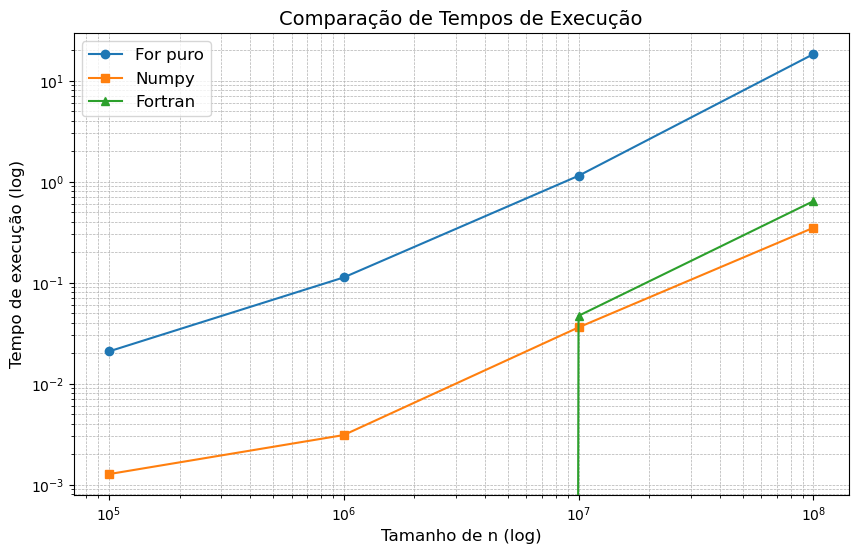

In [30]:
import timeit
import textwrap
import numpy as np
import matplotlib.pyplot as plt

tempos_for = []
tempos_numpy = []
# letra a 
for n in [100_000, 1_000_000, 10_000_000, 100_000_000]:
    alpha = 2

    # usando for puro
    tempo_p1 = timeit.timeit(
        stmt=textwrap.dedent("""
            x = list(range(n)) 
            for i in range(n):
                x[i] = alpha * x[i]
        """),
        globals=globals(),  
        number=1  
    )
    tempos_for.append(tempo_p1)
    #print(f"Tempo de processamento com for (n={n}): {tempo_p1:.6f} s")

    # usando numpy
    tempo_p2 = timeit.timeit(
        stmt="""
x = np.arange(n)
x = alpha * x
""",
        globals=globals(),
        number=1  
    )
    tempos_numpy.append(tempo_p2)
    #print(f"Tempo de processamento com numpy (n={n}): {tempo_p2:.6f} s\n")

print("Tempos com for puro:", tempos_for)
print("Tempos com numpy:", tempos_numpy)


tempos_fortran = [0.0000000000000000, 0.0000000000000000, 4.6875000000000000E-002, 0.64062500000000000]
print("Tempos com Fortran:", tempos_fortran)



# Valores de n
n_values = [100_000, 1_000_000, 10_000_000, 100_000_000]


plt.figure(figsize=(10, 6))
plt.loglog(n_values, tempos_for, label="For puro", marker="o")
plt.loglog(n_values, tempos_numpy, label="Numpy", marker="s")
plt.loglog(n_values, tempos_fortran, label="Fortran", marker="^")
plt.title("Comparação de Tempos de Execução", fontsize=14)
plt.xlabel("Tamanho de n (log)", fontsize=12)
plt.ylabel("Tempo de execução (log)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [28]:
# letra d
import numpy as np
from numba import njit
import timeit
import textwrap

@njit
def soma_numba(x, alpha):
    soma = 0
    for i in range(len(x)):
        soma += alpha * x[i]
    return soma

for n in [100_000, 1_000_000, 10_000_000, 100_000_000]:
    x = list(range(n))
    alpha = 2

    #usando for
    soma = 0
    tempo_p1 = timeit.timeit(
        stmt=textwrap.dedent("""
        soma = 0
        for i in range(n):
            soma += alpha * x[i]
    """),
        globals=globals(),
        number=1
    )
    print(f"Tempo de processamento com for (n={n}):", tempo_p1)


    # usando numpy
    x_np = np.arange(n)
    alpha = 2

    tempo_p2 = timeit.timeit(
        stmt="s = np.sum(alpha * x_np)",
        globals=globals(),
        number=1
    )
    print(f"Tempo de processamento com numpy (n={n}):", tempo_p2)




    # usando numba
    x_nb = np.arange(n)
    alpha = 2

    tempo_p3 = timeit.timeit(
        stmt="soma_numba(x_nb, alpha)",
        globals=globals(),
        number=1
    )
    print(f"Tempo de processamento com numba (n={n}):", tempo_p3)
    print("-" * 50)


Tempo de processamento com for (n=100000): 0.009708499999760534
Tempo de processamento com numpy (n=100000): 0.005552300000090327
Tempo de processamento com numba (n=100000): 0.48341809999965335
--------------------------------------------------
Tempo de processamento com for (n=1000000): 0.10387339999942924
Tempo de processamento com numpy (n=1000000): 0.002876599999581231
Tempo de processamento com numba (n=1000000): 0.0007287999997060979
--------------------------------------------------
Tempo de processamento com for (n=10000000): 1.0703362000003835
Tempo de processamento com numpy (n=10000000): 0.019829599999866332
Tempo de processamento com numba (n=10000000): 0.003385799999705341
--------------------------------------------------
Tempo de processamento com for (n=100000000): 11.218196099999659
Tempo de processamento com numpy (n=100000000): 0.46869060000062746
Tempo de processamento com numba (n=100000000): 0.08321319999959087
--------------------------------------------------


## Exercício 2
![alt text]({AA761B84-F34B-4B3A-91C1-E215C2F1E23B}.png)

In [23]:
import math

#letra a
def seno_taylor(x, N):
    soma = 0
    for n in range(1, N + 1):
        termo = ((-1) ** (n - 1)) * (x ** (2 * n - 1)) / math.factorial(2 * n - 1)
        soma += termo
        print(f"Termo {n}: {termo:.6f}")  # imprime cada termo da série
    return soma

x = math.pi / 4  # 45 graus
N = 10
aproximado = seno_taylor(x, N)
real = math.sin(x)

# teste:
print("letra a")
print(f"Resultado da série de Taylor: {aproximado}")
print(f"math.sin(x): {real}")
print("-"*50)


#letra b
def seno_taylor_erro(x, tolerancia=1e-7):
    soma = 0
    n = 1
    termo = x  # primeiro termo da série (para n=1)
    
    while abs(termo) >= tolerancia:
        termo = ((-1) ** (n - 1)) * (x ** (2 * n - 1)) / math.factorial(2 * n - 1)
        soma += termo
        n += 1

    valor_real = math.sin(x)
    erro_relativo = abs(soma - valor_real) / abs(valor_real)

    return soma, n - 1, erro_relativo

x = 0.5  # menor que 1
resultado, termos_usados, erro_rel = seno_taylor_erro(x)

print("letra b")
print(f"Resultado da série de Taylor: {resultado}")
print(f"math.sin(x): {math.sin(x)}")
print(f"Número de termos usados: {termos_usados}")
print(f"Erro relativo: {erro_rel:.2e}")
print("-"*50)

#letra c
x = 3*math.pi 
N = 10
aproximado = seno_taylor(x, N)
real = math.sin(x)
print("letra c")
print(f"Resultado da série de Taylor: {aproximado}")
print(f"math.sin(x): {real}")


Termo 1: 0.785398
Termo 2: -0.080746
Termo 3: 0.002490
Termo 4: -0.000037
Termo 5: 0.000000
Termo 6: -0.000000
Termo 7: 0.000000
Termo 8: -0.000000
Termo 9: 0.000000
Termo 10: -0.000000
letra a
Resultado da série de Taylor: 0.7071067811865475
math.sin(x): 0.7071067811865476
--------------------------------------------------
letra b
Resultado da série de Taylor: 0.4794255386164159
math.sin(x): 0.479425538604203
Número de termos usados: 5
Erro relativo: 2.55e-11
--------------------------------------------------
Termo 1: 9.424778
Termo 2: -139.528245
Termo 3: 619.689862
Termo 4: -1310.591526
Termo 5: 1616.877486
Termo 6: -1305.649731
Termo 7: 743.437288
Termo 8: -314.461368
Termo 9: 102.692955
Termo 10: -26.672075
letra c
Resultado da série de Taylor: -4.780575661965443
math.sin(x): 3.6739403974420594e-16


In [31]:
import math
from decimal import Decimal, getcontext
import time

# Função para calcular o seno usando a série de Taylor com ponto flutuante (float)
def seno_taylor_float(x, N):
    soma = 0
    for n in range(1, N + 1):
        termo = ((-1) ** (n - 1)) * (x ** (2 * n - 1)) / math.factorial(2 * n - 1)
        soma += termo
    return soma

# Função para calcular o seno usando a série de Taylor com decimal.Decimal
def seno_taylor_decimal(x, N):
    soma = Decimal(0)
    for n in range(1, N + 1):
        termo = ((-1) ** (n - 1)) * (x ** (2 * n - 1)) / Decimal(math.factorial(2 * n - 1))
        soma += termo
    return soma

# Configuração de precisão para Decimal
getcontext().prec = 50  # 50 dígitos de precisão

# Valor de x = 3π
x_float = 3 * math.pi
x_decimal = Decimal(3) * Decimal(math.pi)

# Número de termos da série de Taylor
N = 50

# Cálculo usando ponto flutuante (float)
start_time_float = time.time()
seno_float = seno_taylor_float(x_float, N)
end_time_float = time.time()

# Cálculo usando decimal.Decimal
start_time_decimal = time.time()
seno_decimal = seno_taylor_decimal(x_decimal, N)
end_time_decimal = time.time()

# Valor real usando math.sin
seno_real = math.sin(x_float)

# Erro relativo
erro_relativo_float = abs((seno_real - seno_float) / seno_real)
erro_relativo_decimal = abs((Decimal(seno_real) - seno_decimal) / Decimal(seno_real))

# Resultados
print(f"Valor real (math.sin): {seno_real}")
print(f"Valor aproximado (float): {seno_float}")
print(f"Valor aproximado (decimal): {seno_decimal}")
print(f"Erro relativo (float): {erro_relativo_float:.50f}")
print(f"Erro relativo (decimal): {erro_relativo_decimal:.50f}")
print(f"Tempo de execução (float): {end_time_float - start_time_float:.6f} s")
print(f"Tempo de execução (decimal): {end_time_decimal - start_time_decimal:.6f} s")

Valor real (math.sin): 3.6739403974420594e-16
Valor aproximado (float): -1.5895685018583688e-13
Valor aproximado (decimal): 3.6739403974420595316781977968248285081668843929167E-16
Erro relativo (float): 433.66039453582004625786794349551200866699218750000000
Erro relativo (decimal): 0.00000000000000004264520423333479450434952358581589
Tempo de execução (float): 0.000000 s
Tempo de execução (decimal): 0.001033 s


## Exercício 3 
![alt text]({CB36E9B9-D399-4C78-8D81-331A2961E26B}.png)

In [25]:
import time
for n in [100_000, 1_000_000, 10_000_000, 100_000_000]:
    # Começa a medir o tempo - letra a
    start_time = time.time()

    soma = 0
    for i in range(1, n + 1):
        soma += i

    end_time = time.time()
    elapsed_time = end_time - start_time
    print("letra a")
    print(f"Tempo de execução for (n={n}): {elapsed_time:.6f} segundos\n")

    # Começa a medir o tempo - letra b
    start_time = time.time()
    soma = sum(range(1, n+1))
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("letra b")
    print(f"Tempo de execução sum (n={n}): {elapsed_time:.6f} segundos\n")

    # Começa a medir o tempo - letra c
    start_time = time.time()
    soma = n * (n + 1) // 2  # Fórmula de Gauss
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("letra c")
    print(f"Tempo de execução fórmula (n={n}): {elapsed_time:.6f} segundos\n")
    

    # letra d
    start_time = time.time()
    somas = []
    s = 0
    for i in range(1, n+1):
        s += i
    somas.append(s)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("letra d")
    print(f"Tempo de execução for acumulando (n={n}): {elapsed_time:.6f} segundos\n")
    print("-" * 50)





letra a
Tempo de execução for (n=100000): 0.015298 segundos

letra b
Tempo de execução sum (n=100000): 0.000000 segundos

letra c
Tempo de execução fórmula (n=100000): 0.000000 segundos

letra d
Tempo de execução for acumulando (n=100000): 0.016161 segundos

--------------------------------------------------
letra a
Tempo de execução for (n=1000000): 0.148325 segundos

letra b
Tempo de execução sum (n=1000000): 0.011276 segundos

letra c
Tempo de execução fórmula (n=1000000): 0.000000 segundos

letra d
Tempo de execução for acumulando (n=1000000): 0.157066 segundos

--------------------------------------------------
letra a
Tempo de execução for (n=10000000): 1.399106 segundos

letra b
Tempo de execução sum (n=10000000): 0.214422 segundos

letra c
Tempo de execução fórmula (n=10000000): 0.000000 segundos

letra d
Tempo de execução for acumulando (n=10000000): 1.442372 segundos

--------------------------------------------------
letra a
Tempo de execução for (n=100000000): 15.161567 seg